## F1000W - Stephans Quintet - col/row pull up down cleaning

Goal is to correct for column/row pull up/down.  *Very experimental*

Author: Karl Gordon

Last modified: 1 Jul 2022

### Variables controling processing and display

In [1]:
filter = "F1000W"
basename = "jw0272700700"
fwhm = None
exclude_above = None
pixel_scale = 0.11
ds9point = "rowcol_points.reg"

crval = None
rotation = None
tweakreg = False
align_to_gaia = False

matchbkg = False

# display range for images
drange_raw = [10.0, 500.]
# display range for images
drange_cal = [-0.1, 10.0]
dmap = "afmhot"  # same as ds9 bb

run_cc_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii, fits
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image
from helpers.miri_clean import make_sky, fix_rowcol_pull_updown
from helpers.miri_helpers import miri_image3

In [7]:
import jwst
print(jwst.__version__)

1.5.4.dev17+geec8bb0d


### Clean col/row pull up/down if desired

In [8]:
if ds9point is not None:
    miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_wcs_skysub_cal.fits")
    for cfile in miri_cal_files:
        fix_rowcol_pull_updown(cfile, ds9point, xwidth=40, ywidth=40, xoffset=100, yoffset=100, cortype=None)  # ["topbotright"])

on image ./F1000W/stage2/jw02732002002_02103_00001_mirimage_fixed_wcs_skysub_cal.fits
on image ./F1000W/stage2/jw02732002002_02103_00002_mirimage_fixed_wcs_skysub_cal.fits
on image ./F1000W/stage2/jw02732002002_02103_00003_mirimage_fixed_wcs_skysub_cal.fits
on image ./F1000W/stage2/jw02732002002_02103_00004_mirimage_fixed_wcs_skysub_cal.fits
on image ./F1000W/stage2/jw02732002002_02103_00005_mirimage_fixed_wcs_skysub_cal.fits
on image ./F1000W/stage2/jw02732002002_02103_00006_mirimage_fixed_wcs_skysub_cal.fits
on image ./F1000W/stage2/jw02732002002_02103_00007_mirimage_fixed_wcs_skysub_cal.fits
on image ./F1000W/stage2/jw02732002002_02103_00008_mirimage_fixed_wcs_skysub_cal.fits


### rerun CALWEBB_IMAGE3 with the new cleaned files

In [9]:
if run_cc_image3:
    miri_cccal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_wcs_skysub_cal_colrow.fits")
    output_dir = f"./{filter}/stage3/"
    print(miri_cccal_files)

    if rotation is not None:
        miri_asn_name = f'miri_{filter}_stage3_nirproj_asn_skysub_colrow'
    else: 
        miri_asn_name = f'miri_{filter}_stage3_asn_skysub_colrow'
    miri_asn = asn_from_list.asn_from_list(miri_cccal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

    miri_asn_file = f'{miri_asn_name}.json'
    with open(miri_asn_file, 'w') as outfile:
        name, serialized = miri_asn.dump(format='json')
        outfile.write(serialized)

['./F1000W/stage2/jw02732002001_02103_00001_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002001_02103_00002_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002001_02103_00003_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002001_02103_00004_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002001_02103_00005_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002001_02103_00006_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002001_02103_00007_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002001_02103_00008_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002002_02103_00001_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002002_02103_00002_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002002_02103_00003_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F1000W/stage2/jw02732002002_02103_00004

In [10]:
if run_cc_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg,
                crval=crval, rotation=rotation,
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-15 09:31:54,753 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-15 09:31:54,757 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-15 09:31:54,763 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep instance created.
2022-07-15 09:31:54,768 - stpipe.Image3Pipeline.skymatch - INFO - SkyMatchStep instance created.
2022-07-15 09:31:54,773 - stpipe.Image3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2022-07-15 09:31:54,778 - stpipe.Image3Pipeline.resample - INFO - ResampleStep instance created.
2022-07-15 09:31:54,783 - stpipe.Image3Pipeline.source_catalog - INFO - SourceCatalogStep instance created.
2022-07-15 09:31:55,011 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline running with args ('miri_F1000W_stage3_asn_skysub_colrow.json',).
2022-07-15 09:31:55,026 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 

2022-07-15 09:32:14,605 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-07-15 09:32:16,427 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-07-15 09:32:18,249 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-07-15 09:32:19,995 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-07-15 09:32:21,681 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-07-15 09:32:23,338 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-07-15 09:32:25,158 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-07-15 09:32:26,887 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-07-15 09:32:28,581 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizz

2022-07-15 09:34:07,420 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 199 (0.02%)
2022-07-15 09:34:07,538 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 194 (0.02%)
2022-07-15 09:34:07,666 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 197 (0.02%)
2022-07-15 09:34:07,810 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 241 (0.02%)
2022-07-15 09:34:07,970 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 270 (0.03%)
2022-07-15 09:34:08,112 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 345 (0.03%)
2022-07-15 09:34:08,238 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 298 (0.03%)
2022-07-15 09:34:08,388 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 312 (0.03%)
2022-07-15 09:34:08,524 - stpipe.Image3Pipeline.

2022-07-15 09:34:28,276 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006002_02103_00003_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-07-15 09:34:28,976 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006002_02103_00004_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-07-15 09:34:29,520 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006002_02103_00005_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-07-15 09:34:30,157 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006002_02103_00006_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-07-15 09:34:30,755 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1000W/stage3/jw02732006002_02103_00007_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-07-15 09:34:31,295 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved

2022-07-15 09:36:07,812 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-07-15 09:36:09,625 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-07-15 09:36:11,410 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-07-15 09:36:13,154 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-07-15 09:36:14,787 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-07-15 09:36:16,405 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-07-15 09:36:18,169 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-07-15 09:36:19,881 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-07-15 09:36:21,661 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-07-15 09:36:22,565 - stpipe.Image3Pipelin

2022-07-15 09:38:09,681 - stpipe.Image3Pipeline.resample - INFO - Step resample done
2022-07-15 09:38:09,986 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog running with args (<ImageModel(1994, 2404) from miri_F1000W_stage3_asn_skysub_colrow_i2d.fits>,).
2022-07-15 09:38:09,990 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 100, 'kernel_fwhm': 2.0, 'snr_threshold': 5, 'npixels': 5, 'deblend': False, 'aperture_ee1': 30, 'aperture_ee2': 50, 'aperture_ee3': 70, 'ci1_star_threshold': 2.0, 'ci2_star_threshold': 1.8}
2022-07-15 09:38:10,028 - stpipe.Image3Pipeline.source_catalog - INFO - Using APCORR reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ap

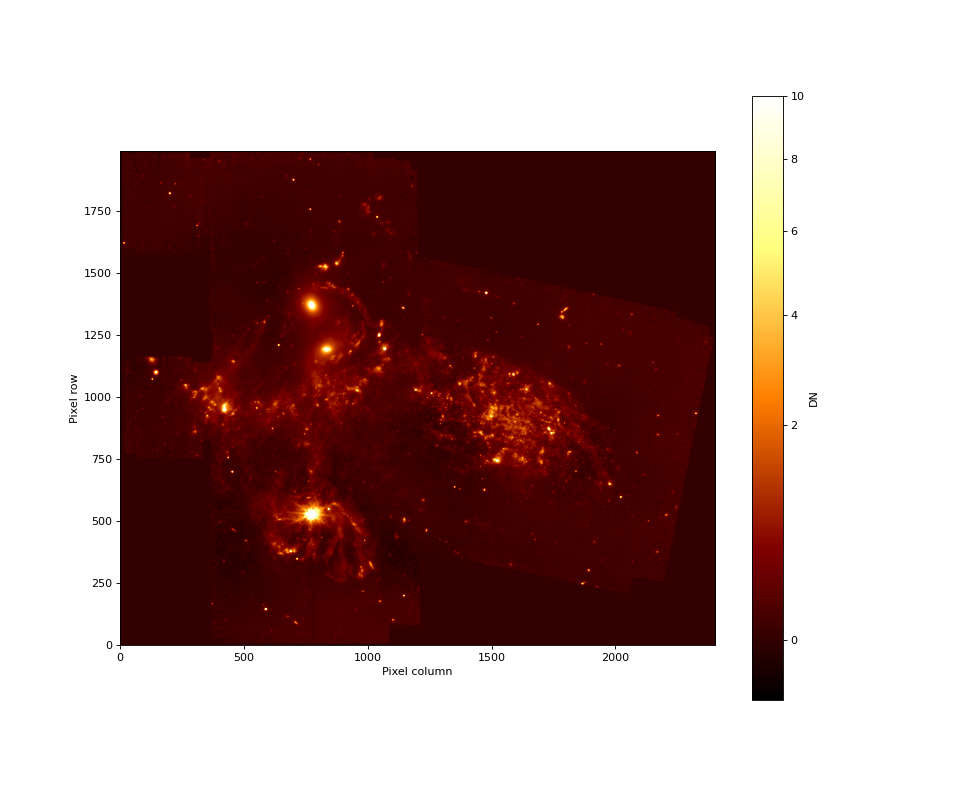

In [11]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_mosaic = datamodels.open(miri_mosaic_file)
drange = drange_cal
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

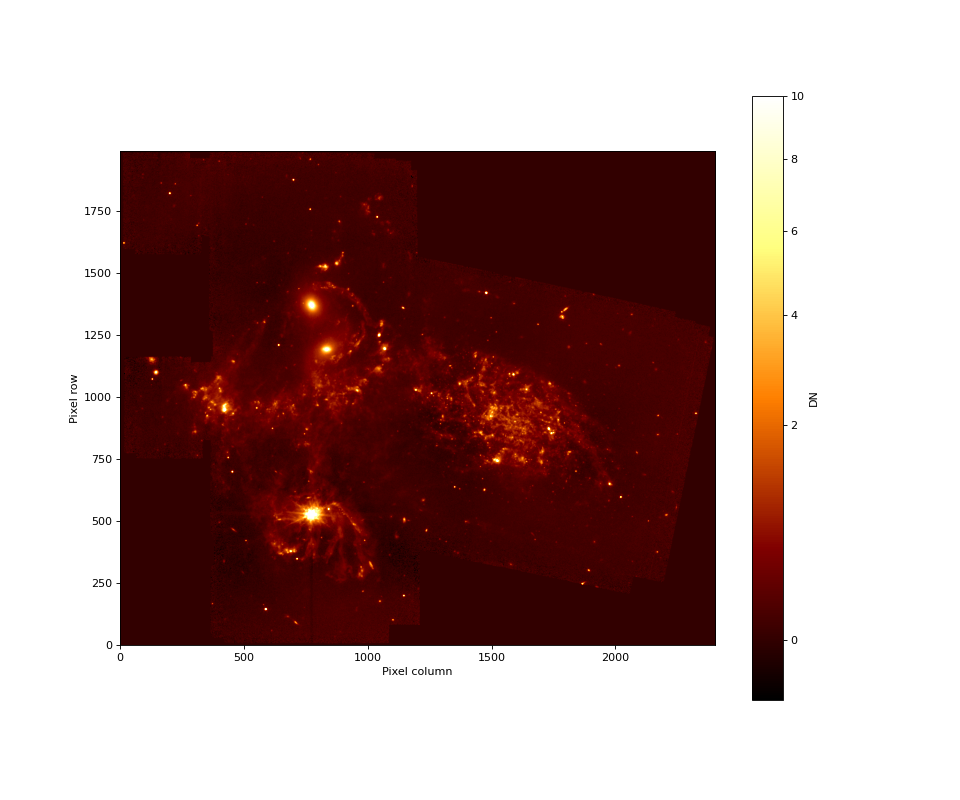

In [12]:
# Look at the pre-correction mosaic image
miri_mosaic_file = output_dir + miri_asn_name.replace("_colrow", "") + '_i2d.fits'
miri_mosaic = datamodels.open(miri_mosaic_file)
drange = drange_cal
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)